# Решающие деревья (decision trees)

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## Принцип работы и визуализация


In [ ]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



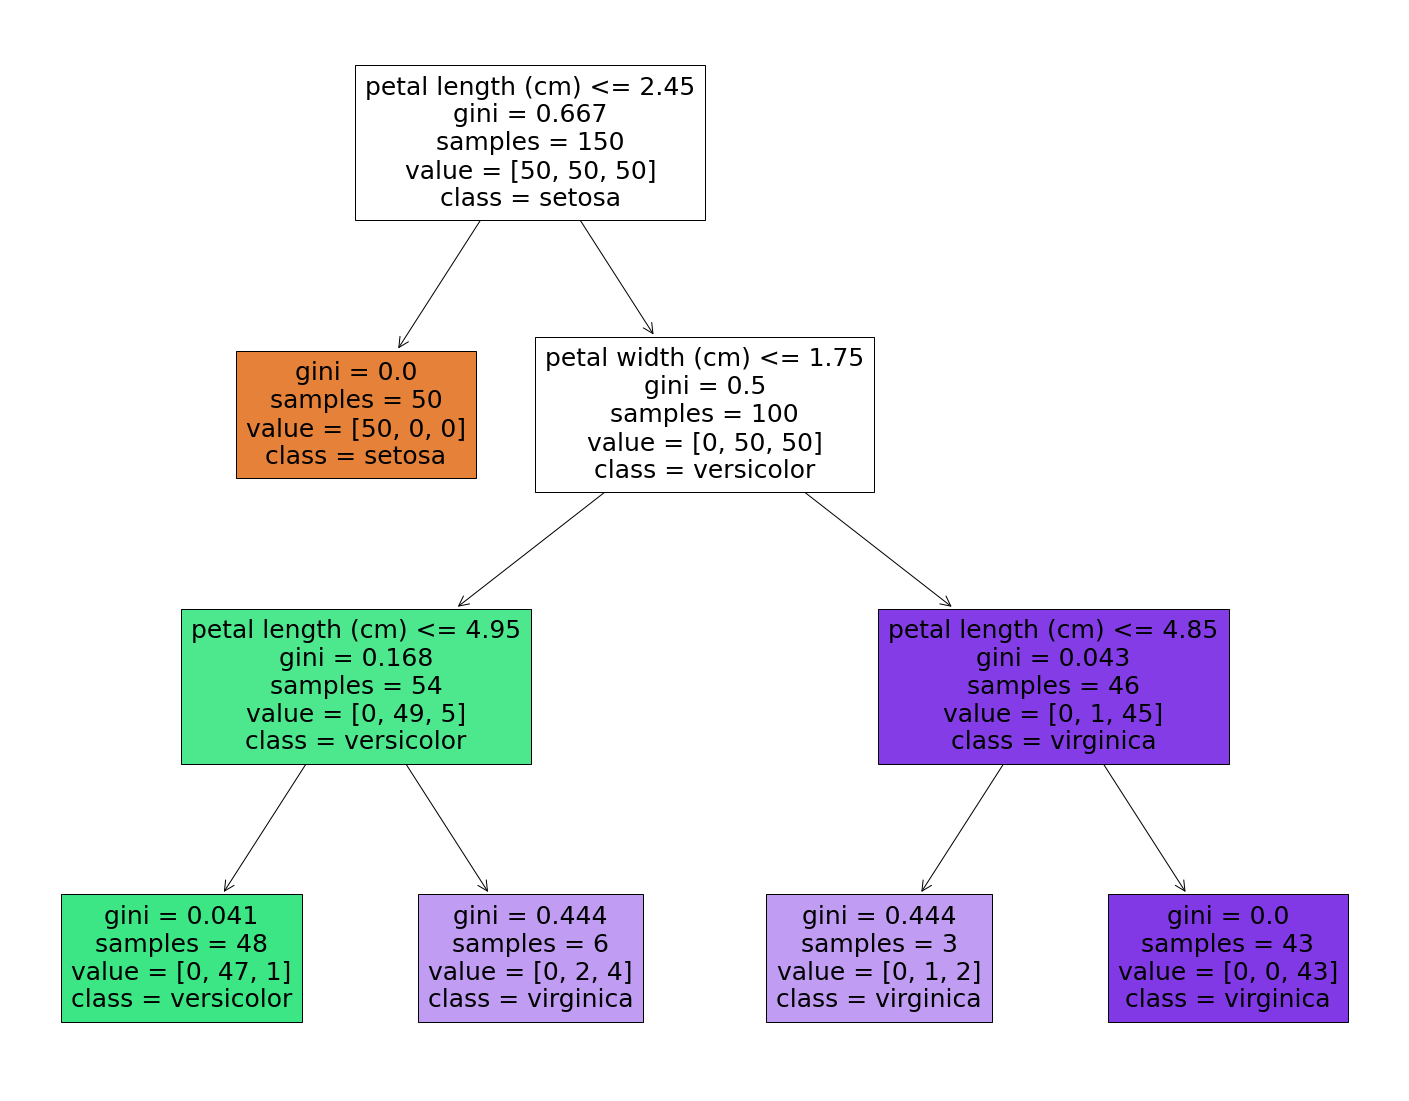

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

In [ ]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets


diab = datasets.load_diabetes()
X = diab.data
y = diab.target

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- value: [108.80]
|   |   |--- feature_6 >  0.02
|   |   |   |--- value: [83.37]
|   |--- feature_2 >  0.01
|   |   |--- feature_0 <= -0.08
|   |   |   |--- value: [274.00]
|   |   |--- feature_0 >  -0.08
|   |   |   |--- value: [154.67]
|--- feature_8 >  -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_2 <= -0.02
|   |   |   |--- value: [137.69]
|   |   |--- feature_2 >  -0.02
|   |   |   |--- value: [176.86]
|   |--- feature_2 >  0.01
|   |   |--- feature_2 <= 0.07
|   |   |   |--- value: [208.57]
|   |   |--- feature_2 >  0.07
|   |   |   |--- value: [268.87]



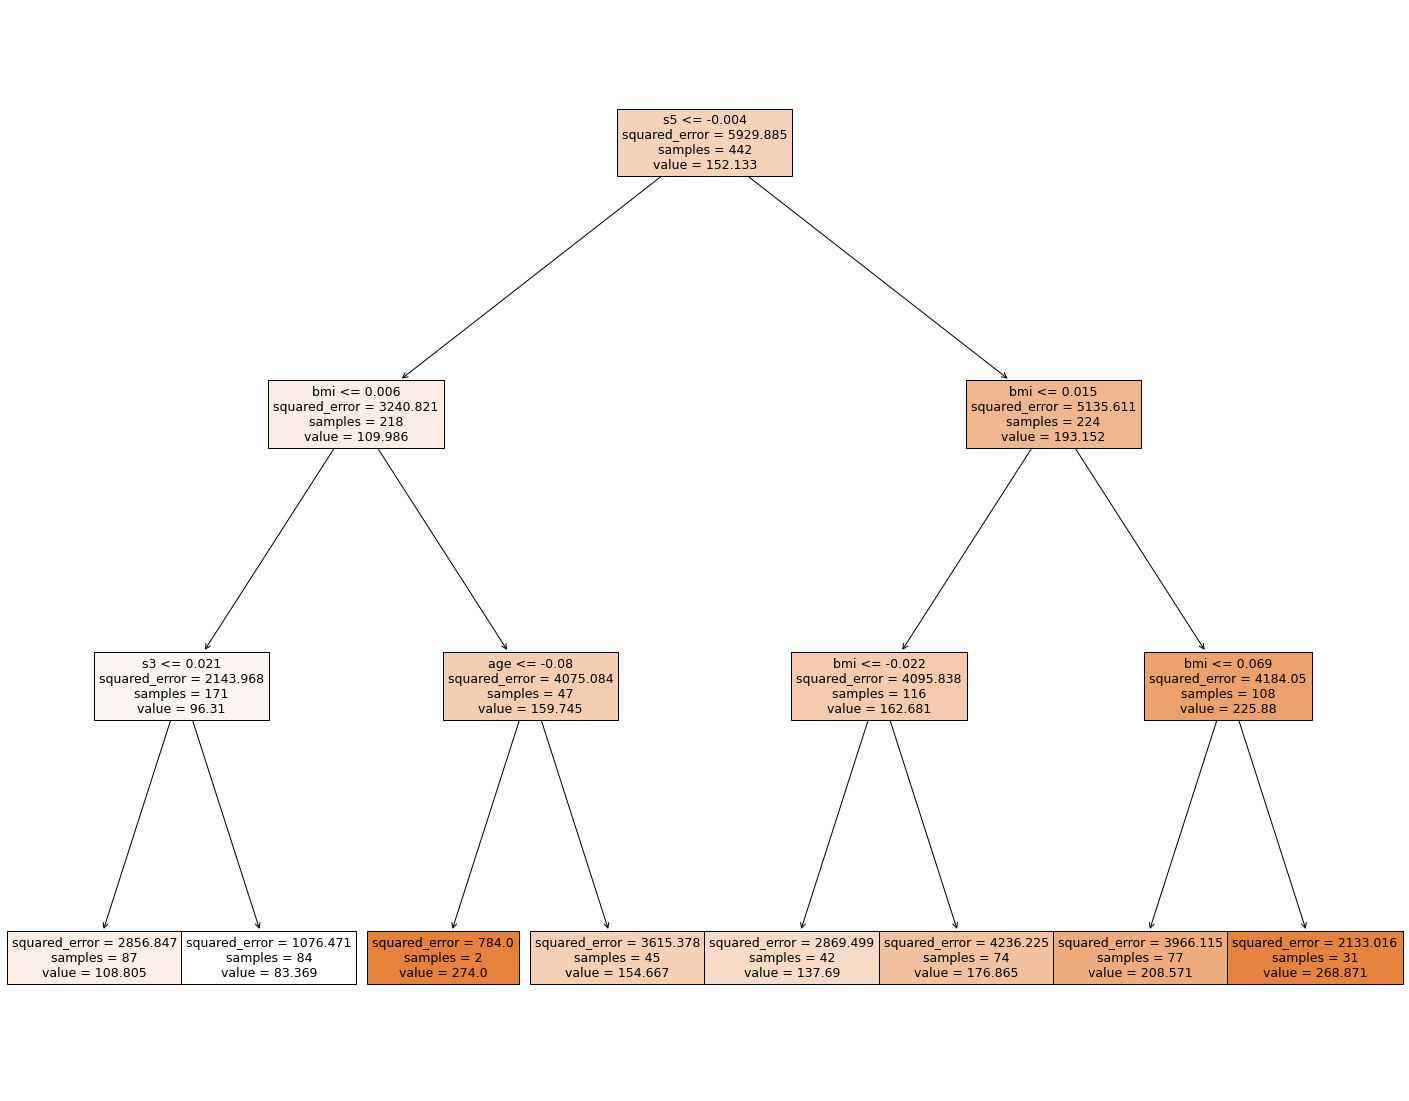

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=diab.feature_names, filled=True)

## Алгоритмы построения

**ID3** (Итеративный дихотомайзер 3) был разработан в 1986 году Россом Куинланом. 
Алгоритм создает дерево, находя для каждого узла (т. е. жадным способом) категориальный признак, который даст наибольший прирост информации. Деревья вырастают до максимального размера, а затем обычно применяется этап отсечения, чтобы улучшить способность дерева обобщать новые данные.

**C4.5** является преемником ID3 и убрал ограничение, согласно которому объекты должны быть категориальными, путем динамического определения дискретного атрибута (на основе числовых переменных), который разбивает непрерывное значение атрибута на дискретный набор интервалов. C4.5 преобразует обученные деревья (т. е. выходные данные алгоритма ID3) в наборы правил «если-то». Затем оценивается точность каждого правила, чтобы определить порядок их применения. Отсечение выполняется путем удаления предусловия правила, если точность правила улучшается без него.

**CART** (деревья классификации и регрессии) очень похож на C4.5, но отличается тем, что поддерживает числовые целевые переменные (регрессия) и не вычисляет наборы правил. CART строит бинарные деревья, используя признак и порог, которые дают наибольший прирост информации в каждом узле.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Алгоритм CART
Строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)

Описание алогритма: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

# Ансамбли
(метаалгоритмы, композиции алгоритмов)

- Бэггинг
 - Метод случайного леса (англ. random forest)
- Бустинг
 - Бустинг над решающими деревьями
- стекинг

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Бэггинг

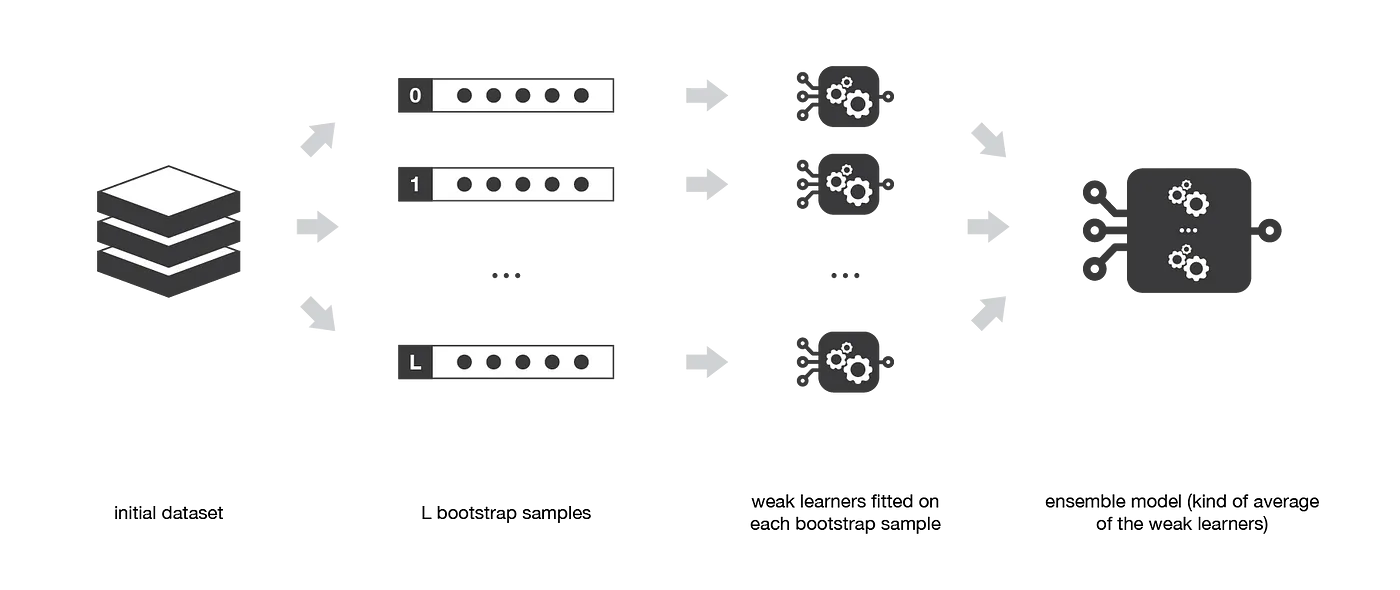

## Бустинг

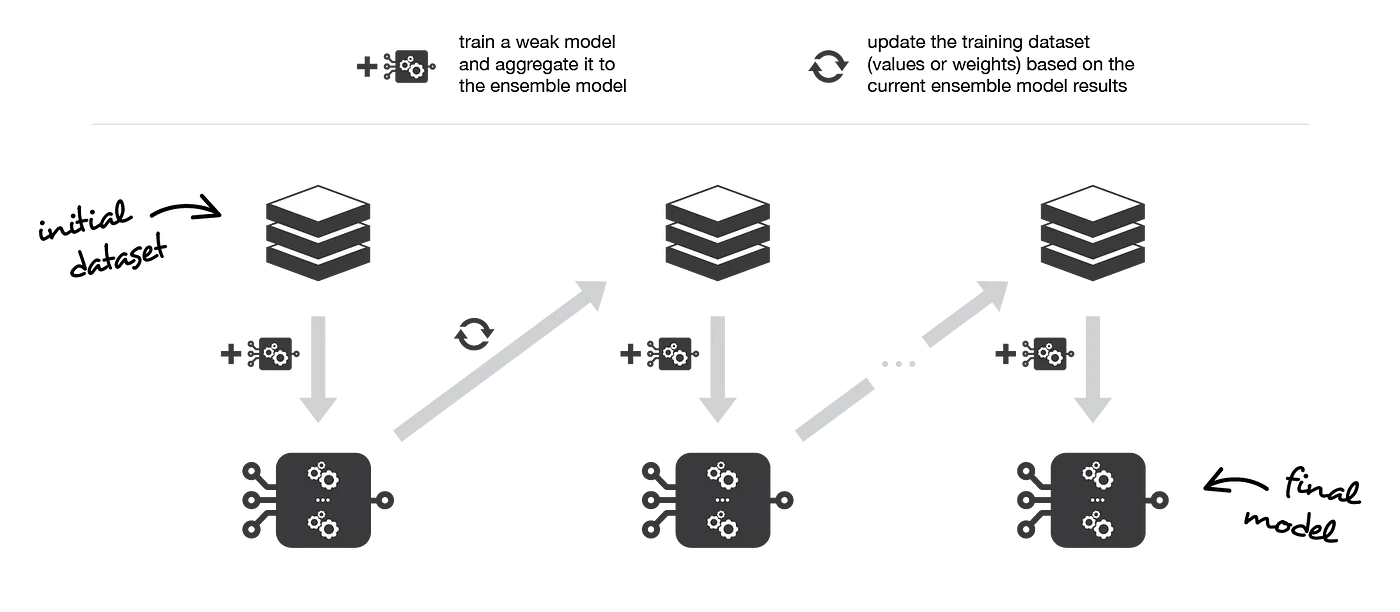

## Стекинг

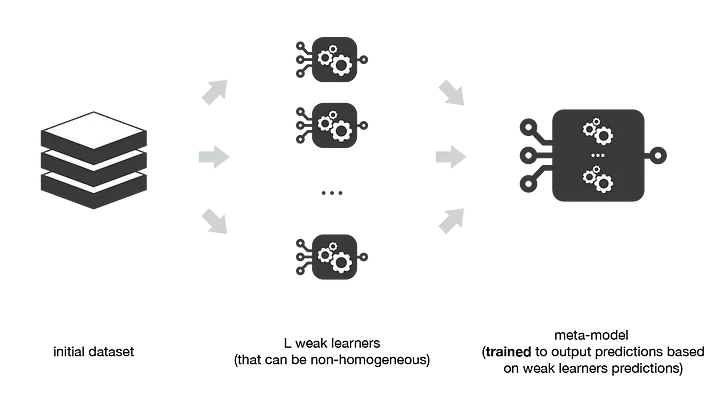

# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

Доп. ссылки:

* https://www.youtube.com/watch?v=kqJ03kWuvO0
* https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya
* https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
* https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting
* https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://basegroup.ru/community/articles/math-cart-part1#comments